# Linear Regression
Solving the example from `FitLine` using the matrix implementation of the general least squares method.

This first example assumes a constant error in y.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# avoid printing out too many decimals
np.set_printoptions(formatter={'float': '{: 0.5f}'.format})

In [3]:
# This is the same data from FitLine, which is
# very rougly a line with a = 0 and b = 1
# except we are taking sigy to be a constant.
x     = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y     = np.array([1.1, 1.8, 3.3, 4.2, 4.9])
#sigy  = np.array([0.12, 0.15, 0.11, 0.18, 0.09])  # before
sigy = np.array([0.12, 0.12, 0.12, 0.12, 0.12])   # assume same sigy

<ErrorbarContainer object of 3 artists>

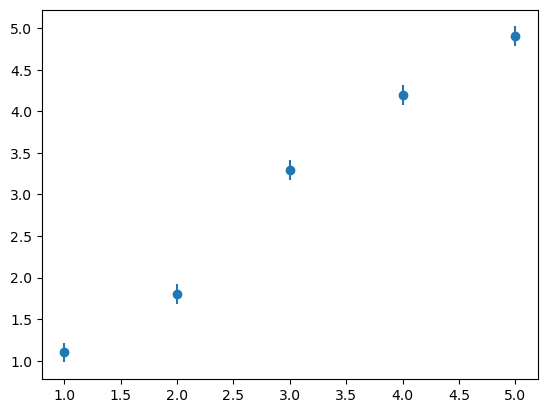

In [4]:
plt.errorbar(x, y, sigy, fmt='o')

First set up the $\mathbf{G}$ matrix (aka design matrix) and $\mathbf{D}$ vector (aka response vector).

In [5]:
# Let's set up the G matrix one row at a time.
# first row of G matrix
G1 = np.ones_like(x)
G1

array([ 1.00000,  1.00000,  1.00000,  1.00000,  1.00000])

In [6]:
# second row of G matrix
G2 = x
G2

array([ 1.00000,  2.00000,  3.00000,  4.00000,  5.00000])

In [7]:
# stack them vertically and take transpose because G is N x M (not M x N)
G = np.vstack([G1, G2]).T
G

array([[ 1.00000,  1.00000],
       [ 1.00000,  2.00000],
       [ 1.00000,  3.00000],
       [ 1.00000,  4.00000],
       [ 1.00000,  5.00000]])

In [8]:
# data vector
D = y
D

array([ 1.10000,  1.80000,  3.30000,  4.20000,  4.90000])

Solve for $$\mathbf{\hat{A}} = (\mathbf{G}^T \mathbf{G)^{-1}} \mathbf{G}^T \mathbf{D} = \mathbf{\psi}^{-1} \mathbf{G}^T \mathbf{D}$$

In [9]:
psi = np.linalg.inv(np.dot(G.T, G))

In [10]:
Ahat = np.dot(psi, np.dot(G.T, D))
Ahat

array([ 0.06000,  1.00000])

Plot data and best-fit model.

In [11]:
def model(x, a, b):
    return a + b*x

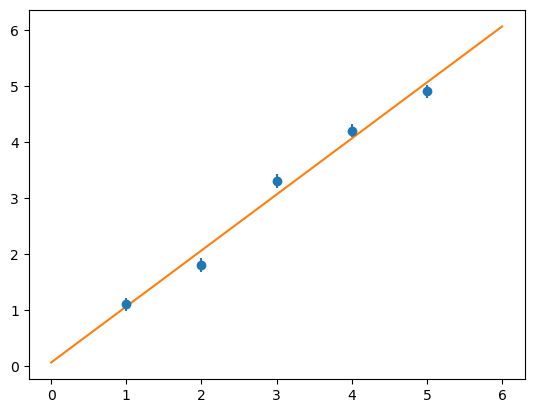

In [12]:
plt.errorbar(x, y, sigy, fmt='o')
xgrid = np.linspace(0, 6, 1000)
plt.plot(xgrid, model(xgrid, *Ahat), c='#ff7f0e')

Now let's generalize this to arbitary errors, but let's still assume that there is no covariance between the datapoints.  So $\sigma = \sigma_i$ is different for all $i$, but $\sigma_{ij} = 0$.

In [13]:
# now allow sigma_y to be different for each data point
x     = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y     = np.array([1.1, 1.8, 3.3, 4.2, 4.9])
sigy  = np.array([0.12, 0.15, 0.11, 0.18, 0.09])

We now just have to set up the data covariance matrix. $$ \mathbf{E} = \begin{pmatrix} \sigma_1^2 & 0 & \ldots & 0 \\ 0 & \sigma_2^2 & \ldots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & ... & \sigma_N^2 \end{pmatrix}$$ $\mathbf{G}$ and $\mathbf{D}$ are still the same.

In [14]:
vars = sigy*sigy
vars

array([ 0.01440,  0.02250,  0.01210,  0.03240,  0.00810])

In [15]:
# data covariance matrix (diagonal of variances; no covariance)
E = np.diag(vars)
E

array([[ 0.01440,  0.00000,  0.00000,  0.00000,  0.00000],
       [ 0.00000,  0.02250,  0.00000,  0.00000,  0.00000],
       [ 0.00000,  0.00000,  0.01210,  0.00000,  0.00000],
       [ 0.00000,  0.00000,  0.00000,  0.03240,  0.00000],
       [ 0.00000,  0.00000,  0.00000,  0.00000,  0.00810]])

In [16]:
# inverse of E
Einv = np.linalg.inv(E)
Einv

array([[ 69.44444,  0.00000,  0.00000,  0.00000,  0.00000],
       [ 0.00000,  44.44444,  0.00000,  0.00000,  0.00000],
       [ 0.00000,  0.00000,  82.64463,  0.00000,  0.00000],
       [ 0.00000,  0.00000,  0.00000,  30.86420,  0.00000],
       [ 0.00000,  0.00000,  0.00000,  0.00000,  123.45679]])

Now, it's just a matter of solving the matrix equation $$\mathbf{\hat{A}} = (\mathbf{G}^T \mathbf{E}^{-1} \mathbf{G)^{-1}} \mathbf{G}^T \mathbf{E}^{-1} \mathbf{D} = \mathbf{\Psi}^{-1} \mathbf{G}^T \mathbf{E}^{-1} \mathbf{D}$$

In [17]:
PSI = np.dot(G.T, np.dot(Einv, G))

In [18]:
Ahat = np.dot(np.linalg.inv(PSI), np.dot(G.T, np.dot(Einv, D)))
Ahat

array([ 0.15899,  0.96591])

This is exactly what we got before in our `FitLine` notebook!

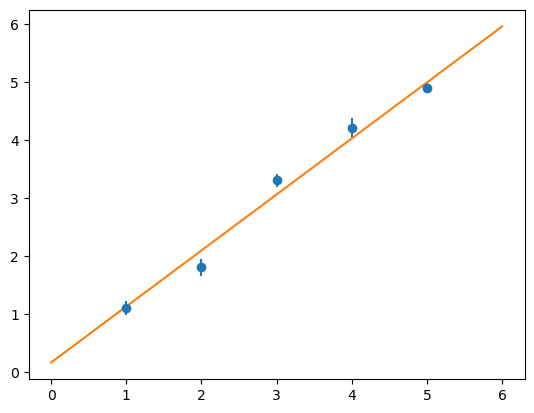

In [19]:
plt.errorbar(x, y, sigy, fmt='o')
xgrid = np.linspace(0, 6, 1000)
plt.plot(xgrid, model(xgrid, *Ahat), c='#ff7f0e')

The covariance matrix $\mathbf{\Sigma}$ is just the inverse of $\mathbf{\Psi}$.  $$\mathbf{\Sigma} = \mathbf{\Psi}^{-1}$$

In [20]:
covmat = np.linalg.inv(PSI)
covmat

array([[ 0.01586, -0.00398],
       [-0.00398,  0.00122]])

In [21]:
from scipy import stats

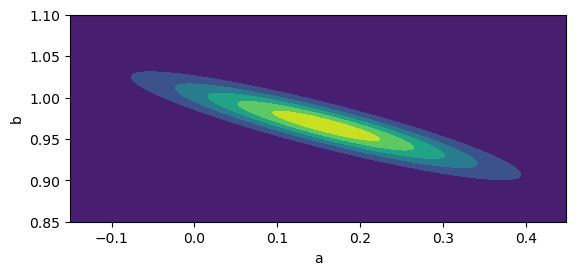

In [22]:
# Borrowing this cell from FitLline n.b.

# For m = 2 dimensions, you need to create a grid of x,y values,
# which you can compute the PDF on.

x, y = np.mgrid[-0.15:0.45:0.001, 0.85:1.1:0.001]
pos  = np.dstack((x, y))

means  = Ahat
#covmat = [[siga**2, covab], [covab, sigb**2]]

pdf  = stats.multivariate_normal.pdf(pos, mean=means, cov=covmat)

fig = plt.figure()
ax  = fig.add_subplot()
ax.contourf(x, y, pdf)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_aspect('equal')  # plot with equal axes

This is visually pleasing, but the contour levels are not particularly helpful.  We want to be able to draw ellipses that contain certain probabilities.

These are the $\chi^2_{\mathrm{crit}}$ values for $M=1$ and $M=2$ for various probabilities.  See Table 10.2 in Gregory.

In [23]:
# For M = 1
print('Delta chi^2 = %6.3f' % stats.chi2.ppf(0.6826894921370859, df=1))
print('Delta chi^2 = %6.3f' % stats.chi2.ppf(0.9000000000000000, df=1))
print('Delta chi^2 = %6.3f' % stats.chi2.ppf(0.9544997361036415, df=1))
print('Delta chi^2 = %6.3f' % stats.chi2.ppf(0.9900000000000000, df=1))
print('Delta chi^2 = %6.3f' % stats.chi2.ppf(0.9973002039367398, df=1))
print('Delta chi^2 = %6.3f' % stats.chi2.ppf(0.9999000000000000, df=1))

Delta chi^2 =  1.000
Delta chi^2 =  2.706
Delta chi^2 =  4.000
Delta chi^2 =  6.635
Delta chi^2 =  9.000
Delta chi^2 = 15.137


In [24]:
# For M = 2
print('Delta chi^2 = %6.3f' % stats.chi2.ppf(0.6826894921370859, df=2))  # 1 sigma
print('Delta chi^2 = %6.3f' % stats.chi2.ppf(0.9000000000000000, df=2))  # 90%
print('Delta chi^2 = %6.3f' % stats.chi2.ppf(0.9544997361036415, df=2))  # 2 sigma
print('Delta chi^2 = %6.3f' % stats.chi2.ppf(0.9900000000000000, df=2))  # 99%
print('Delta chi^2 = %6.3f' % stats.chi2.ppf(0.9973002039367398, df=2))  # 3 sigma
print('Delta chi^2 = %6.3f' % stats.chi2.ppf(0.9999000000000000, df=2))  # 99.99%

Delta chi^2 =  2.296
Delta chi^2 =  4.605
Delta chi^2 =  6.180
Delta chi^2 =  9.210
Delta chi^2 = 11.829
Delta chi^2 = 18.421


Now let's diagonalize $\mathbf{\Psi}$ and solve for the eigenvalues and eigenvectors.  This can be done by `np.linalg.eigh`, which works for any symmetric (Hermitian) matrix.

In [25]:
w, v = np.linalg.eigh(PSI)

In [26]:
# eigenvalues
w

array([ 59.27047,  4862.85482])

In [27]:
# eigenvectors (normalized)
v

array([[-0.96917,  0.24638],
       [ 0.24638,  0.96917]])

In [28]:
from matplotlib import patches

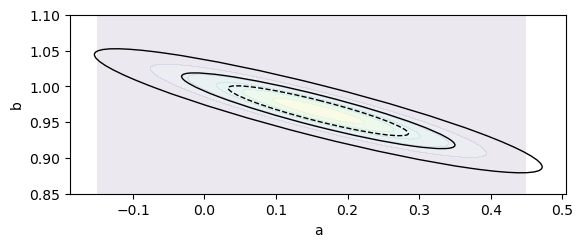

In [29]:
# Copying this from above... let's add ellipses of constant chi^2.

x, y = np.mgrid[-0.15:0.45:0.001, 0.85:1.1:0.001]
pos  = np.dstack((x, y))

means  = Ahat
#covmat = [[siga**2, covab], [covab, sigb**2]]

pdf  = stats.multivariate_normal.pdf(pos, mean=means, cov=covmat)

fig = plt.figure()
ax  = fig.add_subplot()
ax.contourf(x, y, pdf, alpha=0.1)

angle = np.arctan2(v[0,1], v[0,0])*180/np.pi
#print(v[0,1], v[0,0], angle)

# This is the joint contour that contains 68.3%
k1 = 2.3
e1 = patches.Ellipse((Ahat[0], Ahat[1]),
                     width=2*np.sqrt(k1/w[0]), height=2*np.sqrt(k1/w[1]),
                     fill=False, linewidth=1, angle=angle)
ax.add_patch(e1)

# This is the joint contour that contains 95.4%
k2 = 6.17
e2 = patches.Ellipse((Ahat[0], Ahat[1]),
                     width=2*np.sqrt(k2/w[0]), height=2*np.sqrt(k2/w[1]),
                     fill=False, linewidth=1, angle=angle)
ax.add_patch(e2)

# If you want the parameter range of *each* parameter rather than
# the joing PDF, you need to use Delta chi^2 values for M=1 parameter.
# So for 1-sigma ranges:
k3 = 1.00
e3 = patches.Ellipse((Ahat[0], Ahat[1]),
                     width=2*np.sqrt(k3/w[0]), height=2*np.sqrt(k3/w[1]),
                     fill=False, linewidth=1, angle=angle, ls='--')
ax.add_patch(e3)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_aspect('equal')  # plot with equal axes

In [30]:
siga = np.sqrt(covmat[0,0])
sigb = np.sqrt(covmat[1,1])

In [31]:
print('a = %7.4f +/- %7.4f' % (Ahat[0], siga))
print('    %7.4f  -  %7.4f' % (Ahat[0]-siga, Ahat[0]+siga))
print('b = %7.4f +/- %7.4f' % (Ahat[1], sigb))
print('    %7.4f  -  %7.4f' % (Ahat[1]-sigb, Ahat[1]+sigb))

a =  0.1590 +/-  0.1259
     0.0331  -   0.2849
b =  0.9659 +/-  0.0349
     0.9310  -   1.0008


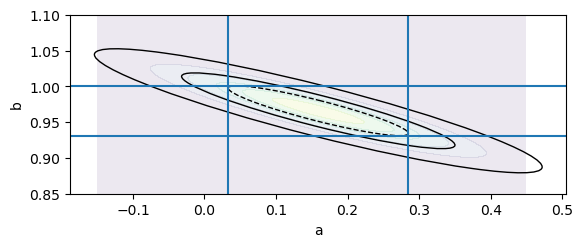

In [32]:
# Copying this from above... let's add ellipses of constant chi^2.

x, y = np.mgrid[-0.15:0.45:0.001, 0.85:1.1:0.001]
pos  = np.dstack((x, y))

means  = Ahat
#covmat = [[siga**2, covab], [covab, sigb**2]]

pdf  = stats.multivariate_normal.pdf(pos, mean=means, cov=covmat)

fig = plt.figure()
ax  = fig.add_subplot()
ax.contourf(x, y, pdf, alpha=0.1)

angle = np.arctan2(v[0,1], v[0,0])*180/np.pi
#print(v[0,1], v[0,0], angle)

# This is the joint contour that contains 68.3%
k1 = 2.3
e1 = patches.Ellipse((Ahat[0], Ahat[1]),
                     width=2*np.sqrt(k1/w[0]), height=2*np.sqrt(k1/w[1]),
                     fill=False, linewidth=1, angle=angle)
ax.add_patch(e1)

# This is the joint contour that contains 95.4%
k2 = 6.17
e2 = patches.Ellipse((Ahat[0], Ahat[1]),
                     width=2*np.sqrt(k2/w[0]), height=2*np.sqrt(k2/w[1]),
                     fill=False, linewidth=1, angle=angle)
ax.add_patch(e2)

# If you want the parameter range of *each* parameter rather than
# the joing PDF, you need to use Delta chi^2 values for M=1 parameter.
# So for 1-sigma ranges:
k3 = 1.00
e3 = patches.Ellipse((Ahat[0], Ahat[1]),
                     width=2*np.sqrt(k3/w[0]), height=2*np.sqrt(k3/w[1]),
                     fill=False, linewidth=1, angle=angle, ls='--')
ax.add_patch(e3)

# add lines that bound 1-sigma ranges for each parameter
ax.axvline(x=Ahat[0]+np.sqrt(covmat[0,0]))
ax.axvline(x=Ahat[0]-np.sqrt(covmat[0,0]))

ax.axhline(y=Ahat[1]+np.sqrt(covmat[1,1]))
ax.axhline(y=Ahat[1]-np.sqrt(covmat[1,1]))

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_aspect('equal')  # plot with equal axes

Let's work out the example given in the book.

In [33]:
# This is from Table 10.1 in the book.
sig   = np.sqrt(8.1)
x     = np.array([10, 20, 30, 40, 50, 60, 70, 80])
y     = np.array([0.5, 4.67, 6.25, 10.0, 13.5, 13.7, 17.5, 23.0])
sigs  = np.array([sig, sig, sig, sig, sig, sig, sig, sig])
ns    = np.array([14, 3, 25, 2, 3, 22, 5, 2])
sigy  = sigs/np.sqrt(ns)

<ErrorbarContainer object of 3 artists>

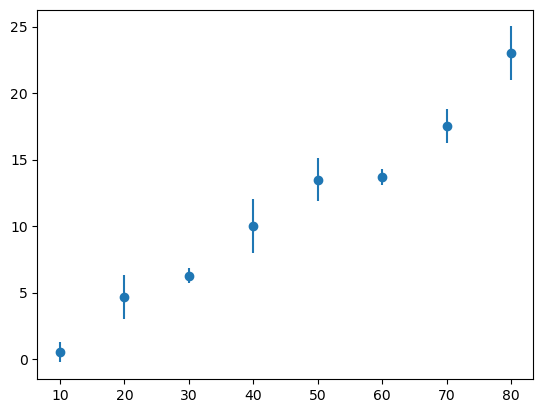

In [34]:
# See Figure 10.2
plt.errorbar(x, y, sigy, fmt='o')

In [35]:
G1 = np.ones_like(x)
G2 = x
G  = np.vstack([G1, G2]).T

D  = y

vars = sigy*sigy
E = np.diag(vars)
Einv = np.linalg.inv(E)
PSI = np.dot(G.T, np.dot(Einv, G))
Ahat = np.dot(np.linalg.inv(PSI), np.dot(G.T, np.dot(Einv, D)))

In [36]:
Ahat

array([-2.05452,  0.27535])

In [37]:
PSI

array([[ 9.38272,  371.60494],
       [ 371.60494,  18802.46914]])

Compare this with Figure 10.2.

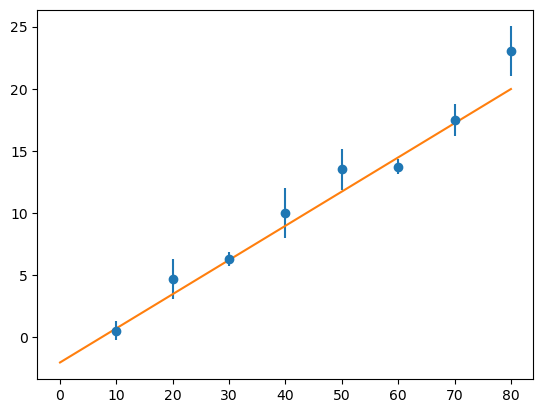

In [38]:
plt.errorbar(x, y, sigy, fmt='o')
xgrid = np.linspace(0, 80, 1000)
plt.plot(xgrid, model(xgrid, *Ahat), c='#ff7f0e')

In [39]:
covmat = np.linalg.inv(PSI)
#w, v = np.linalg.eigh(covmat)
w, v = np.linalg.eigh(PSI)

In [40]:
w

array([ 2.03766,  18809.81419])

In [41]:
v

array([[-0.99980,  0.01976],
       [ 0.01976,  0.99980]])

Text(0, 0.5, 'b')

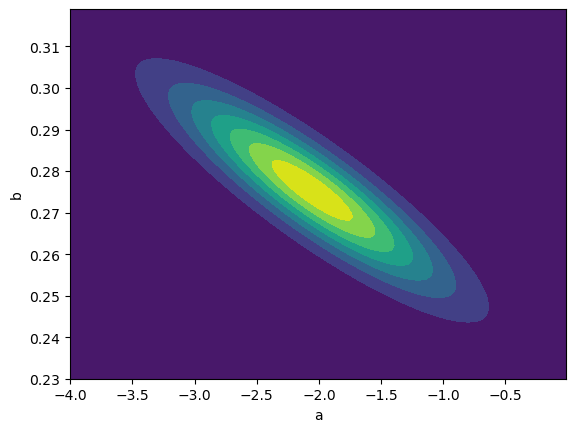

In [42]:
# For m = 2 dimensions, you need to create a grid of x,y values,
# which you can compute the PDF on.

x, y = np.mgrid[-4.00:0.00:0.01, 0.23:0.32:0.001]
pos  = np.dstack((x, y))

means  = Ahat
#covmat = [[siga**2, covab], [covab, sigb**2]]

pdf  = stats.multivariate_normal.pdf(pos, mean=means, cov=covmat)

fig = plt.figure()
ax  = fig.add_subplot()
ax.contourf(x, y, pdf)
ax.set_xlabel('a')
ax.set_ylabel('b')
#ax.set_aspect('equal')  # plot with equal axes

In [43]:
from matplotlib import patches

Compare this with Figure 10.4.

(0.23, 0.32)

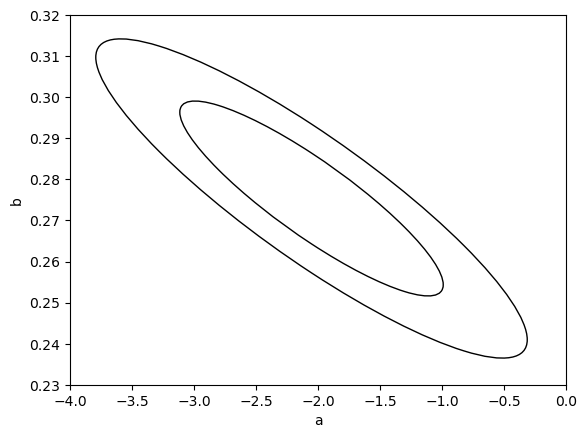

In [44]:
x, y = np.mgrid[-4.00:0.00:0.01, 0.23:0.32:0.001]
pos  = np.dstack((x, y))

means  = Ahat
#covmat = [[siga**2, covab], [covab, sigb**2]]

pdf  = stats.multivariate_normal.pdf(pos, mean=means, cov=covmat)

fig = plt.figure()
ax  = fig.add_subplot()

ax.contourf(x, y, pdf, alpha=0)

angle = np.arctan2(v[0,1], v[0,0])*180/np.pi

k1 = 2.3
e1 = patches.Ellipse((Ahat[0], Ahat[1]),
                     width=2*np.sqrt(k1/w[0]), height=2*np.sqrt(k1/w[1]),
                     fill=False, linewidth=1, angle=angle)
ax.add_patch(e1)

k2 = 6.17
e2 = patches.Ellipse((Ahat[0], Ahat[1]),
                     width=2*np.sqrt(k2/w[0]), height=2*np.sqrt(k2/w[1]),
                     fill=False, linewidth=1, angle=angle)
ax.add_patch(e2)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_xlim([-4.0, 0.00])
ax.set_ylim([0.23, 0.32])
#ax.set_aspect('equal')  # plot with equal axes

In [45]:
covmat

array([[ 0.49057, -0.00970],
       [-0.00970,  0.00024]])

In [46]:
np.sqrt(covmat[0,0])

0.7004052136554262

In [47]:
np.sqrt(covmat[1,1])

0.015646104072033977

Now let's plot the $\Delta \chi^2 = 1$ (and $4$) contours and show that the boundaries correspond to $\pm 1\sigma$ (and $\pm 2\sigma$).

Compare this with Figure 10.4.

(0.23, 0.32)

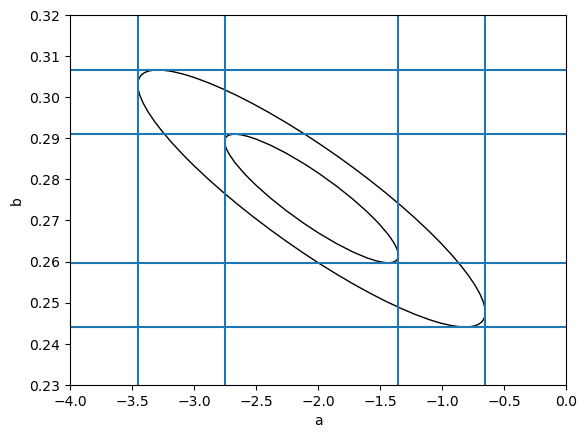

In [48]:
x, y = np.mgrid[-4.00:0.00:0.01, 0.23:0.32:0.001]
pos  = np.dstack((x, y))

means  = Ahat
#covmat = [[siga**2, covab], [covab, sigb**2]]

pdf  = stats.multivariate_normal.pdf(pos, mean=means, cov=covmat)

fig = plt.figure()
ax  = fig.add_subplot()

ax.contourf(x, y, pdf, alpha=0)

angle = np.arctan2(v[0,1], v[0,0])*180/np.pi

k1 = 1.00
e1 = patches.Ellipse((Ahat[0], Ahat[1]),
                     width=2*np.sqrt(k1/w[0]), height=2*np.sqrt(k1/w[1]),
                     fill=False, linewidth=1, angle=angle)
ax.add_patch(e1)

k2 = 4.00
e2 = patches.Ellipse((Ahat[0], Ahat[1]),
                     width=2*np.sqrt(k2/w[0]), height=2*np.sqrt(k2/w[1]),
                     fill=False, linewidth=1, angle=angle)
ax.add_patch(e2)

ax.axvline(x=Ahat[0]+np.sqrt(covmat[0,0]))
ax.axvline(x=Ahat[0]-np.sqrt(covmat[0,0]))
ax.axvline(x=Ahat[0]+2*np.sqrt(covmat[0,0]))
ax.axvline(x=Ahat[0]-2*np.sqrt(covmat[0,0]))

ax.axhline(y=Ahat[1]+np.sqrt(covmat[1,1]))
ax.axhline(y=Ahat[1]-np.sqrt(covmat[1,1]))
ax.axhline(y=Ahat[1]+2*np.sqrt(covmat[1,1]))
ax.axhline(y=Ahat[1]-2*np.sqrt(covmat[1,1]))

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_xlim([-4.0, 0.00])
ax.set_ylim([0.23, 0.32])
#ax.set_aspect('equal')  # plot with equal axes